# The .save is due to problems faced during git push - instructor named it this way to help solve issues

### Achilles Saxby - aes807
### HW6_Assignment_1_Solutions
### fbb scheleton notebook for PUI2016 HW6
#### Notebook restarted several times to get the correct changes/values

#### Second part of Assignment:
    - Merging Datasets
    - Plotting Polynomials
    - Extra Credits
#### Took help from Henry Lin in the second part of the assignment - he helped me understand what code to use and why we use it !!

In [2]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import json
import requests
import zipfile
import urllib
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas.tools.plotting import scatter_matrix

%pylab inline

pl.style.use('fivethirtyeight')

Populating the interactive namespace from numpy and matplotlib


In [3]:
DFDATA = os.getenv('DFDATA')
PUI2016 = os.getenv('PUI2016')
PUIDATA = os.getenv('PUIDATA')

#### Data on Energy Consumption

In [4]:
url = "https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv?accessType=DOWNLOAD"
"curl -o " + PUI2016 + "/energy.csv " + url

'curl -o /home/cusp/aes807/PUI2016/energy.csv https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv?accessType=DOWNLOAD'

In [5]:
os.system("wget " + "https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mappluto_16v1.zip")

0

In [6]:
if os.path.isfile(os.getenv("PUIDATA") + "/" + "mappluto_16v1.zip"):
    print("Data is Ready !!")
else:
    print("The Data has not been downloaded properly - check !!")

os.system("unzip " + os.getenv("PUIDATA") + "/" + "mappluto_16v1.zip")

if os.system(os.getenv("PUIDATA") + "/" + "Manhattan" + "/") and \
os.system(os.getenv("PUIDATA") + "/" + "Bronx" + "/") and \
os.system(os.getenv("PUIDATA") + "/" + "Brooklyn" + "/") and \
os.system(os.getenv("PUIDATA") + "/" + "Staten_Island" + "/") and \
os.system(os.getenv("PUIDATA") + "/" + "Queens" + "/"):
    print("All the Data is Unzipped and in the right place !!")
else:
    os.system("mv " + "Manhattan " + os.getenv("PUIDATA"))
    os.system("mv " + "Bronx " + os.getenv("PUIDATA"))
    os.system("mv " + "Brooklyn " + os.getenv("PUIDATA"))
    os.system("mv " + "Queens " + os.getenv("PUIDATA"))
    os.system("mv " + "Staten_Island " + os.getenv("PUIDATA"))

os.system("rm " + "-r " + "Manhattan/")
os.system("rm " + "-r " + "Brooklyn/")
os.system("rm " + "-r " + "Bronx/")
os.system("rm " + "-r " + "Staten_Island/")
os.system("rm " + "-r " + "Queens/")

Data is Ready !!
All the Data is Unzipped and in the right place !!


0

I am using geopanda. that is **not required** for this particular exercise, but geopand works with geospacial data: the shape files that we get from pluto for example.

PLEASE REMEMBER: seed your random functions if you need to use any, label your axes clearly, comment your code, use PEP8!


## An interesting urban question is "can we measure and predict energy use based on observables that are easier to be acquired". For example the urban observatory at CUSP can monitor lights: they are a realtively easy observable. All you need is a camera, and a pipeline to process your data. But how does the light coming from a window relate to the total energy consumption? We generally postulate that light is a proxy for occupancy, and that occupancy is a good predictor of energy consumption.
## So let's test if the last link holds. If we have data on the energy consumed by a __building__ how well does that relate to the number of units in the building?

## Data on energy consumption can be found here for the city of NY https://data.cityofnewyork.us/Environment/Energy-and-Water-Data-Disclosure-for-Local-Law-84-/rgfe-8y2z  

## Either obtain the data through the API or download the csv file, and move it to $PUIDATA

## However this datasets does not have the number of units. We can find that in the Pluto dataset.

## Reading in the Pluto data for manhattan, which will give me the number of units ber building   Manhattan/MNMapPLUTO.shp

In [7]:
nrg = pd.DataFrame.from_csv(url) 
nrg.head()

,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
Record Number,,,,,,,,,,,,,,,,,,,,,
12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,NaN,...,Yes,None,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN
12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,NaN,...,No,None,NaN,NaN,NaN,NaN,NaN,440360.0,NaN,1.0
15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,NaN,...,NaN,None,Not Available,NaN,NaN,NaN,50000,NaN,Multifamily Housing,NaN


In [8]:
nrg.columns

Index(['NYC Borough, Block, and Lot (BBL)', 'Co-reported BBL Status',
       'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'],
      dtype='object')

In [9]:
bsize = gp.read_file(PUIDATA + "/" + "Manhattan" "/" + "MNMapPLUTO.shp")

In [10]:
bsize.columns

Index(['APPBBL', 'APPDate', 'Address', 'AllZoning1', 'AllZoning2',
       'AreaSource', 'AssessLand', 'AssessTot', 'BBL', 'BldgArea', 'BldgClass',
       'BldgDepth', 'BldgFront', 'Block', 'BoroCode', 'Borough', 'BsmtCode',
       'BuiltCode', 'BuiltFAR', 'CB2010', 'CD', 'CT2010', 'ComArea', 'CommFAR',
       'CondoNo', 'Council', 'EDesigNum', 'Easements', 'ExemptLand',
       'ExemptTot', 'Ext', 'FacilFAR', 'FactryArea', 'FireComp', 'GarageArea',
       'HealthArea', 'HistDist', 'IrrLotCode', 'LandUse', 'Landmark', 'Lot',
       'LotArea', 'LotDepth', 'LotFront', 'LotType', 'LtdHeight', 'MAPPLUTO_F',
       'NumBldgs', 'NumFloors', 'OfficeArea', 'OtherArea', 'Overlay1',
       'Overlay2', 'OwnerName', 'OwnerType', 'PLUTOMapID', 'PolicePrct',
       'ProxCode', 'ResArea', 'ResidFAR', 'RetailArea', 'SHAPE_Area',
       'SHAPE_Leng', 'SPDist1', 'SPDist2', 'Sanborn', 'SanitBoro', 'SanitDist',
       'SanitSub', 'SchoolDist', 'SplitZone', 'StrgeArea', 'TaxMap',
       'Tract2010', 'UnitsRe

#### Scatter Plot without changing any values / dropping any columns !!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc39be038d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc39ba86ba8>]], dtype=object)

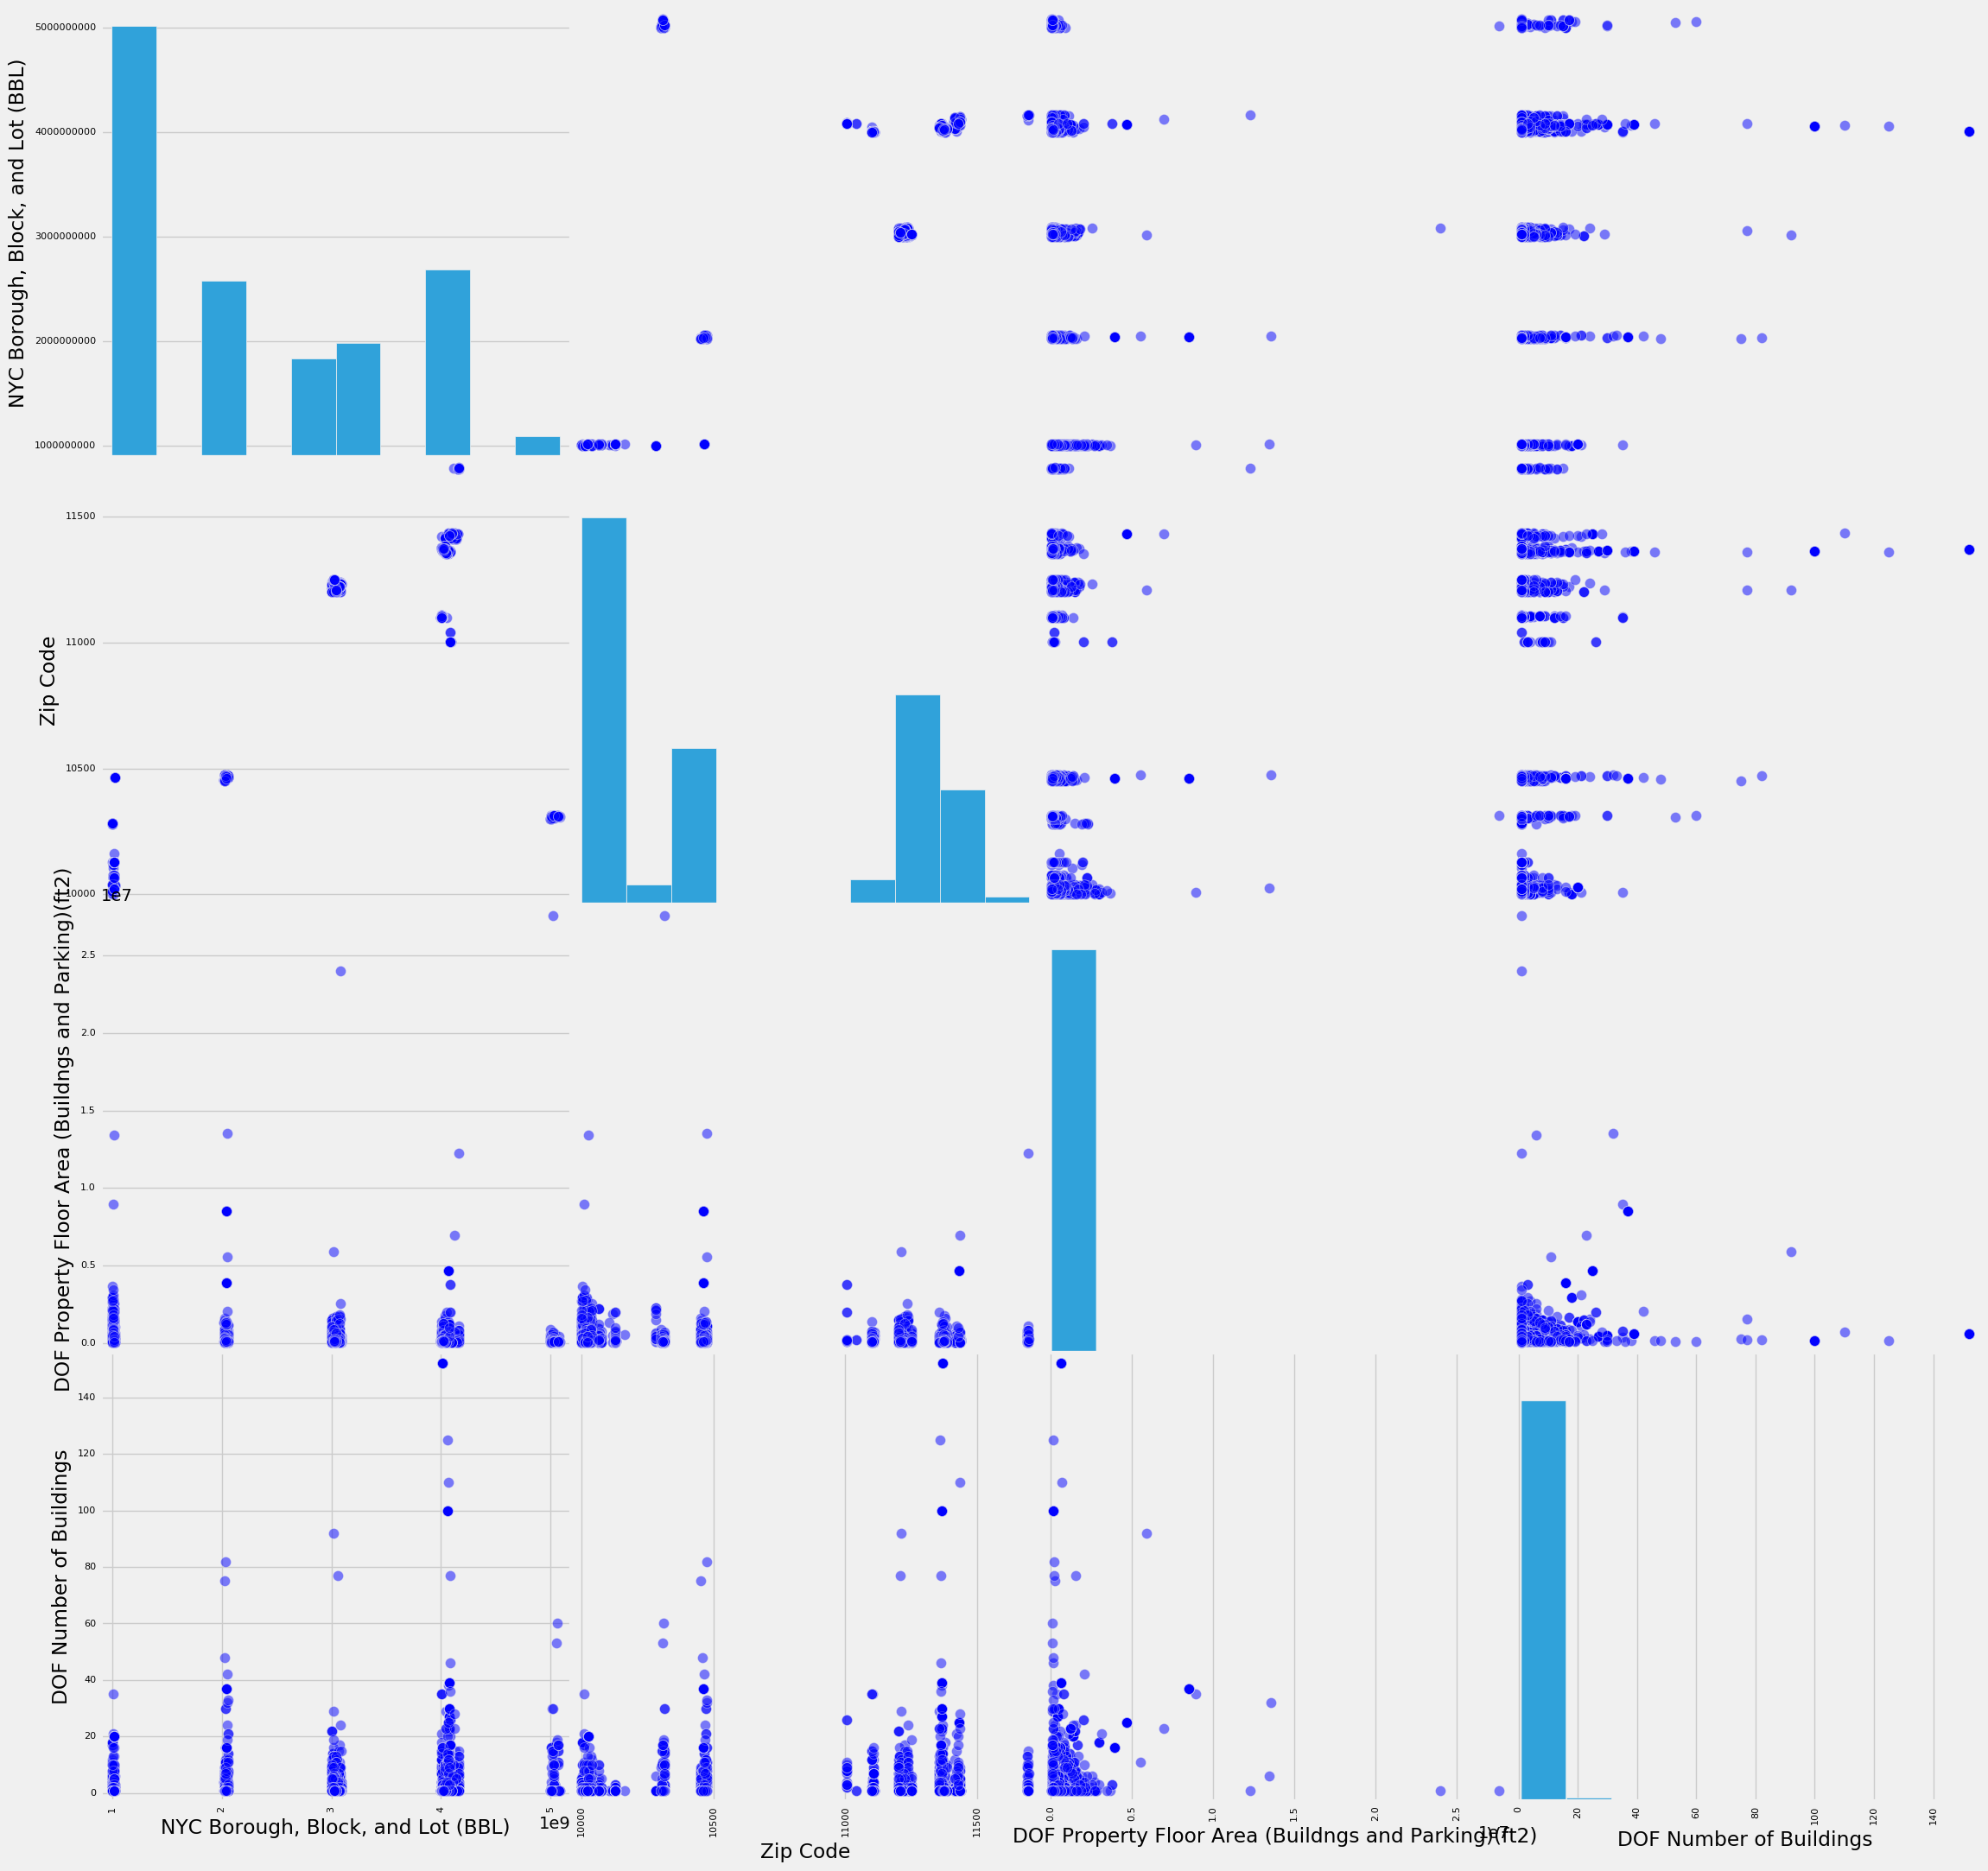

In [11]:
#try make a scatter plot of nrg. Few columns will plot
pd.scatter_matrix (nrg, s=300, figsize=(25, 25))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc39b8dc4e0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc39b243518>]], dtype=object)

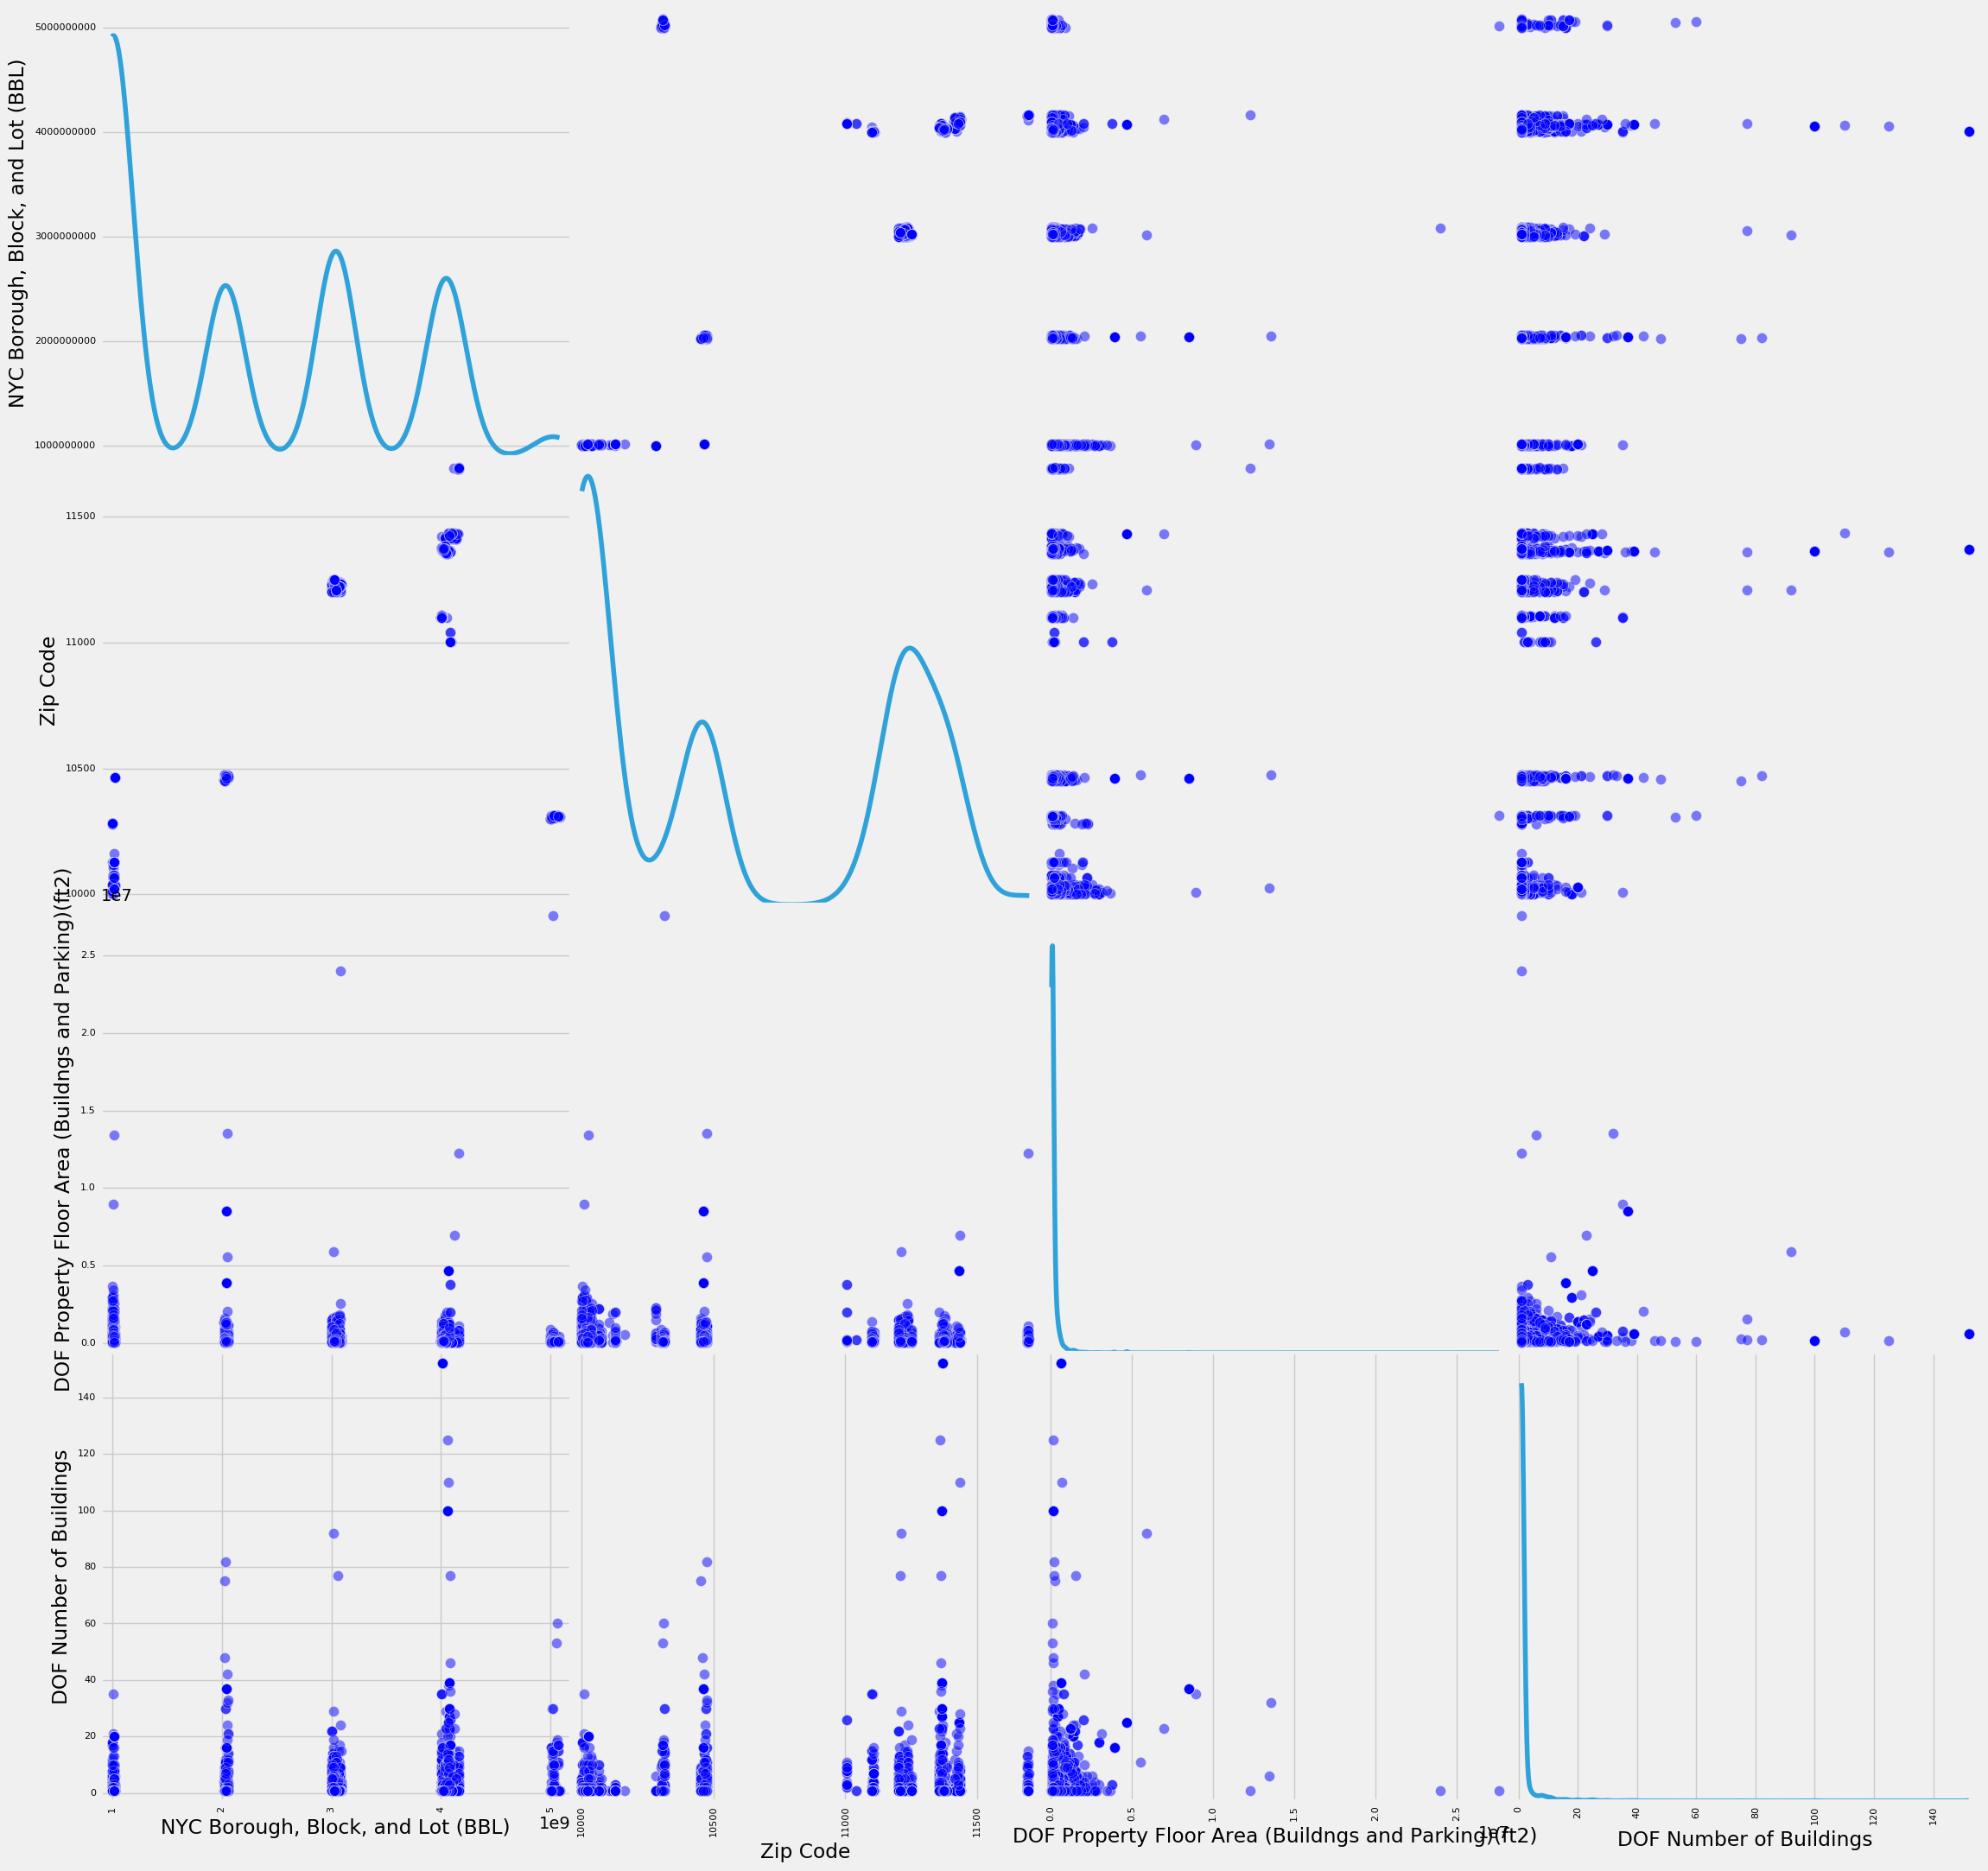

In [12]:
pd.scatter_matrix (nrg, s=300, figsize=(25, 25), diagonal = 'kde')

#### Dropping Columns that are not needed in the "nrg" data !!

In [14]:
# Columns that are needed are mentioned below:
#'NYC Borough, Block, and Lot (BBL)'
#'SiteEUI(kBtu/ft2)'
#'Reported Property Floor Area (Building(s))(ft2)

nrg_main = nrg.drop(['Co-reported BBL Status',
       'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'DOF Benchmarking Submission Status',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'],1)
nrg_main.head()

,"NYC Borough, Block, and Lot (BBL)",Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²)
Record Number,,,
12086,1.000410e+09,NaN,918919
14354,4.021460e+09,NaN,NaN
12150,2.027620e+09,NaN,64200
12590,1.006700e+09,NaN,NaN
15591,2.048300e+09,NaN,50000


In [15]:
len(nrg_main)

16170

Figure 1: scatter matrix of all numerical values in the files.

This kind of plot shows correlations between variables, but it will also show me what can and cannot be plotted trivially in my dataset. Here only a few columns can be plotted: those that contain only numbers (and possibly NaN's), but most columns contain rows that cannot be converted to float (e.g. entries like 'See Primary BBL' in several rows for the energy dataframe 'Site EUI(kBtu/ft2) ' column) , so Pandas refuses to plot them, cause it does not know what to do with those entries. The columns I am interested in are in fact u'Site EUI(kBtu/ft2)' which is a measure of the energy consumed PER SQ FOOT by a building, and then the building area: for eg. u'Reported Property Floor Area (Building(s)) (ft²)'. Neither gets plotted: i need to remove all values that cannot conver to float in order to use the columns and convert them to float arrays and do math with them.
Below I created a function that returns True if what is passed as argument can be converted to a float, and False otherwise. I do it with the Try/Except structure. it is a very useful python functionality that you should look into.
This has to be done entry by entry: if you give it a series you get error "cannot convert the series to..."
However you can pass it a whole array by using it in conjunction with np.vectorize (look up the syntax!) which will implement a for loop for you under the hood to pass the series entry by entry to your function.

In [16]:
def canconvert(mydata):
    try:
        float(mydata)
        return True
    except ValueError:
        return False

indx = (np.vectorize(canconvert)(nrg_main['Site EUI(kBtu/ft2)']))
print ("invalid entries changed to NaN %d"%sum(indx))
nrg_main['Site EUI(kBtu/ft2)'][~indx] = float('NaN')

indx2 = (np.vectorize(canconvert)(nrg_main['Reported Property Floor Area (Building(s)) (ft²)']))
print ("invalid entries changed to NaN %d"%sum(indx2))
nrg_main['Reported Property Floor Area (Building(s)) (ft²)'][~indx] = float('NaN')

indx3 = (np.vectorize(canconvert)(nrg_main['NYC Borough, Block, and Lot (BBL)']))
print ("invalid entries changed to NaN %d"%sum(indx3))
nrg_main['NYC Borough, Block, and Lot (BBL)'][~indx] = float('NaN')

invalid entries changed to NaN 15513


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


invalid entries changed to NaN 15430
invalid entries changed to NaN 16170


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Now for every column I care about I can create an array, call it for eg. indx, of True and False (a Boolean array) that i can use as an index to pick entries that I want to use from my arrays of interest. 

I can replace the entries that failed to be converted to 'NaN'
(because my function return Trues when I can convert and False otherwise i actuallly want the complementary array: ~indx) 

In [17]:
##check that your conversion worked: e.g.
print (nrg_main['Site EUI(kBtu/ft2)'].astype(float))
#[...] check all columns you care about in both datasets. 
#Nan's are ok, but you must not get an error when you try the conversion
#the Pluto data is much better at not using spurious entries for numerical value columns. 
#but check you can use the columns you want

Record Number
12086      NaN
14354      NaN
12150      NaN
12590      NaN
15591      NaN
12135      NaN
8523       NaN
15920      NaN
14241      NaN
15925      NaN
9685       NaN
7540       NaN
14360      NaN
10588      NaN
14423      NaN
12515      NaN
3028     125.4
14609      NaN
12096      NaN
6666       NaN
8914       NaN
11586      NaN
11714      NaN
14307      NaN
12761      NaN
12091      NaN
16027      NaN
13378      NaN
14911      NaN
15103      NaN
         ...  
14559      NaN
14560      NaN
14748      NaN
14753      NaN
13582      NaN
13947      NaN
14777      NaN
14779      NaN
14409      NaN
13262      NaN
13261      NaN
12523      NaN
12529      NaN
12536      NaN
13929      NaN
13944      NaN
13945      NaN
13821      NaN
13829      NaN
13837      NaN
13838      NaN
13847      NaN
14352      NaN
12976      NaN
12978      NaN
12984      NaN
12987      NaN
12988      NaN
13472      NaN
13482      NaN
Name: Site EUI(kBtu/ft2), dtype: float64


In [18]:
bsize.BBL.astype(float)
#this should not return an error
#notice i can use the attribute notation to refer to columns in bsize, 
#cause the column names do not have spaces!

0        1.015450e+09
1        1.007238e+09
2        1.016800e+09
3        1.013850e+09
4        1.011970e+09
5        1.002360e+09
6        1.008370e+09
7        1.001960e+09
8        1.022240e+09
9        1.011270e+09
10       1.011650e+09
11       1.021740e+09
12       1.009120e+09
13       1.007920e+09
14       1.012110e+09
15       1.011240e+09
16       1.009040e+09
17       1.010090e+09
18       1.020620e+09
19       1.020630e+09
20       1.008940e+09
21       1.005728e+09
22       1.004400e+09
23       1.019470e+09
24       1.008830e+09
25       1.020810e+09
26       1.021610e+09
27       1.008570e+09
28       1.008830e+09
29       1.020410e+09
             ...     
42667    1.014738e+09
42668    1.006208e+09
42669    1.007218e+09
42670    1.013428e+09
42671    1.019448e+09
42672    1.017298e+09
42673    1.018488e+09
42674    1.005008e+09
42675    1.020448e+09
42676    1.004518e+09
42677    1.020958e+09
42678    1.007688e+09
42679    1.008498e+09
42680    1.017298e+09
42681    1

In [19]:
#Professor's Example
indx = (np.vectorize(canconvert)(nrg['Site EUI(kBtu/ft2)']))
print ("invalid entries changed to NaN %d"%sum(indx))
nrg['Site EUI(kBtu/ft2)'][~indx] = float('NaN')
#do it for however many columns you need

invalid entries changed to NaN 15513


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# MERGE THE DATASET
TO DO IT WE NEED A COMMON COLUMN: the building id BBL However the name of this variable (column) in the Energy dataset is 'NYC Borough, Block, and Lot (BBL)'. create a column 'BBL' in the nrg dataset to pass it to the 'on' keyword argument of the merge pandas method: pd.merge(..... on=['BBL']) will use the common column 'BBL' to join the information from the 2 datasets for each BBL value (check out the complete syntax!)

In [20]:
# prepare your BBL columns
nrg.rename(columns={"NYC Borough, Block, and Lot (BBL)": "BBL"}, inplace=True)

In [21]:
#merge
bblnrgdata = pd.merge(nrg, bsize, on=["BBL"])

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/axes/_base.py:3045: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedc6297128>,
        ...,
        ...,
        ...,
       ..., 
        ...,
        ...,
        ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fed6b8e6860>]], dtype=object)

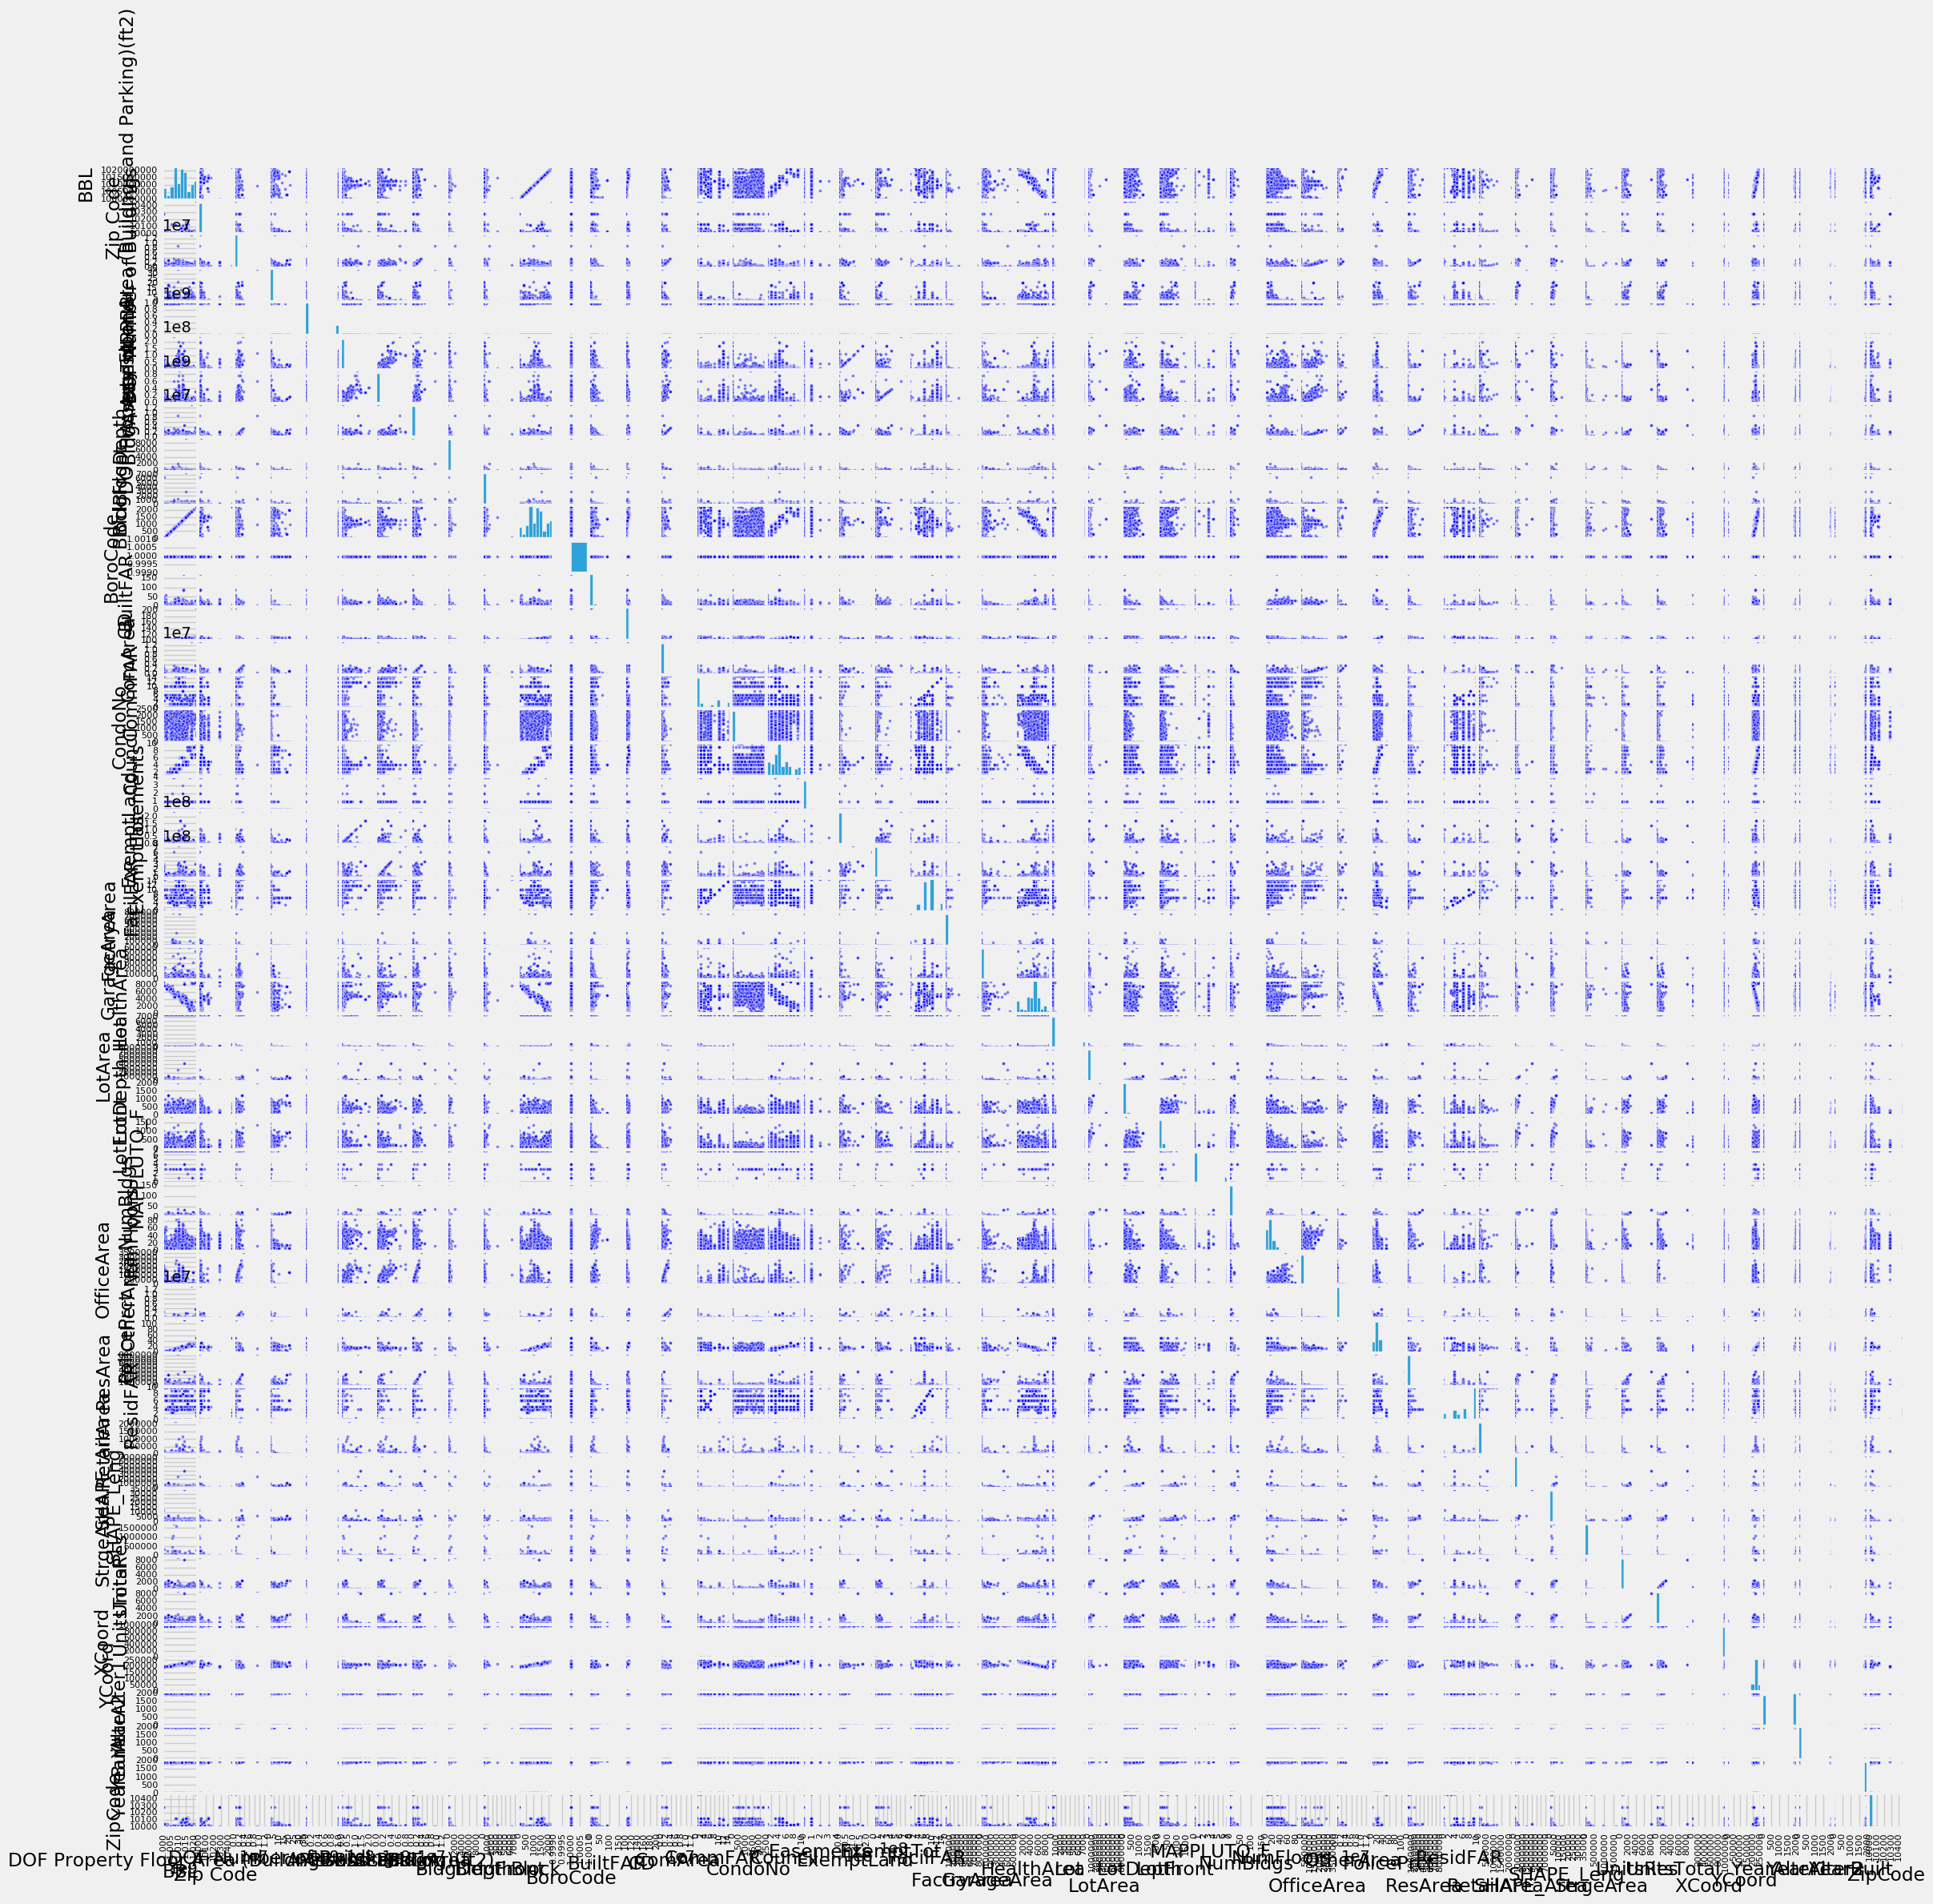

In [22]:
# Now the scatter matrix plot should show more columns.
# first scatter plot
scatter_matrix (bblnrgdata, s=30, figsize=(25,25))

In [22]:
coeff1 = pd.to_numeric(bblnrgdata['Site EUI(kBtu/ft2)'], errors="coerce")
coeff2 = pd.to_numeric(bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)'],errors="coerce")
bblnrgdata["energy_comsumption"] = coeff1.multiply(coeff2)
bblnrgdata = bblnrgdata[~bblnrgdata.energy_comsumption.isnull()]

once you have the dataframe with all the info you want, you want to plot Energy vs Number of Units in the Building. Remember: **Energy TOTAL, not per sq ft...** Here you can choose what you think makes more sense for the number of units: all units, residential units... 

**Make a  scatter plot first of Energy vs Units. It will look really bad be cause all the datapoints are at very low Unit numbers while the Unit number range actually goes up to 8000. **


Make a second plot that zooms into the region where most points are by cutting your x and y axis plotted: e,g, use xlim=(1000,1e10), ylim=(1,1000), where the numbers to be plugged in depend on exactly what you chose to plot

I left my plots below as guidance. **Remember, each plot needs a descriptive caption, and axis labels**

In [23]:
# zoomed in scatter plot
bblnrgdata_clean = bblnrgdata[(bblnrgdata.energy_comsumption > 1000) & (bblnrgdata["UnitsRes"] > 10)]

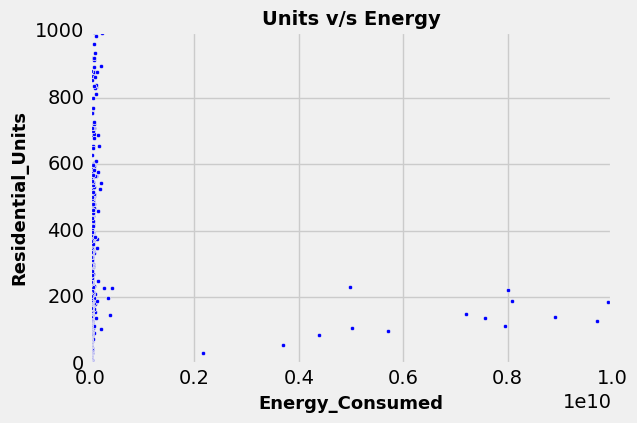

In [24]:
ax = bblnrgdata_clean.plot.scatter(y="UnitsRes", x="energy_comsumption", s=10)
ax.set_ylim(1,1000)
ax.set_xlim(1000,1e10)
ax.set_xlabel("Energy_Consumed", fontsize = 13, fontweight = 'bold')
ax.set_ylabel("Residential_Units", fontsize = 13, fontweight = 'bold')
ax.set_title("Units v/s Energy", fontsize = 14, fontweight = 'bold')
pl.show()

when the points in a plot all look scrunched against the axis 

**Try to make a log plot instead**. In pandas you enable that with the keyword 'loglog' : bblnrgdata.plot(..... loglog=True)

NOTICE THAT YOU WILL STILL HAVE TO CUT YOUR DATASET! in my data I had a lot of energy datapoints that were exactly 0. I removed these "outliers" which I think are truly outliers in the sense that they are misreported numbers. you can remove the data that have nrg==0 (or nrg < some sensible threshold choice) by indexing your array: something like bblnrgdata_cut = bblnrgdata[bblnrgdata.nrg>1000]

Also I removed the buildings with several thousand units. points like that at the edge of my range would have a lot of "LEVERAGE", however they are not suprious entries like the 0, which i believe are missing values, or perhaps abandoned lots. these are good datapoint that i need to throw away functionally for my analysis to work, but that should be stated clearly.



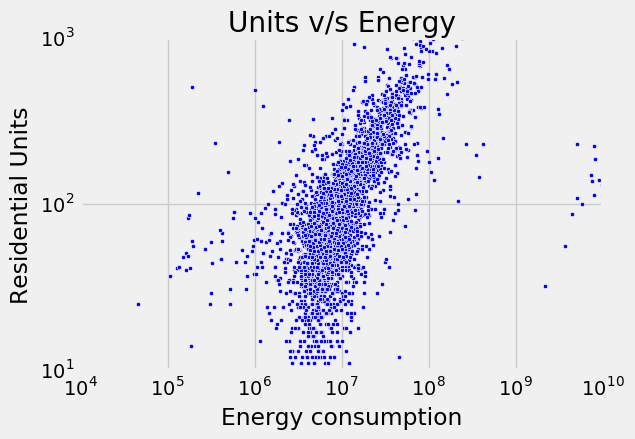

In [25]:
#log plot - 1
ax = bblnrgdata_clean.plot.scatter(y="UnitsRes", x="energy_comsumption", s=10, loglog=True)
ax.set_ylim(10,1000)
ax.set_xlim(1e4,1e10)
ax.set_xlabel("Energy consumption")
ax.set_ylabel("Residential Units")
ax.set_title("Units v/s Energy")
pl.show()

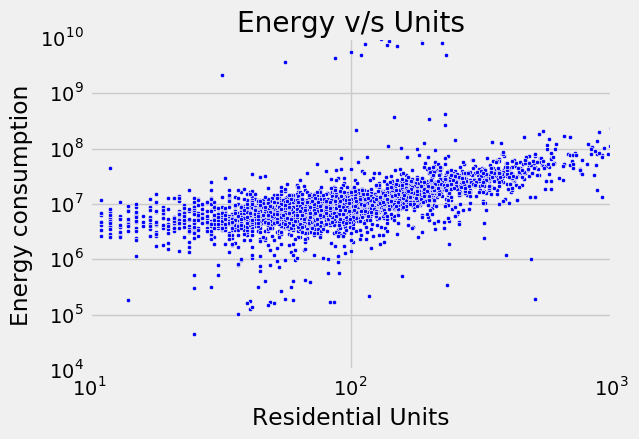

In [26]:
#log plot - 2
ax = bblnrgdata_clean.plot.scatter(y="energy_comsumption", x="UnitsRes", s=10, loglog=True)
ax.set_xlim(10,1000)
ax.set_ylim(1e4,1e10)
ax.set_xlabel("Residential Units")
ax.set_ylabel("Energy consumption")
ax.set_title("Energy v/s Units")
pl.show()

Now fit a line through the data. you can use whatever you want to do it: statsmodels, scipy, any other package, or write your own minimization of the residuals

## BUT REMEMBER: we see hints of a linear relation in log space! so we want to fit a line to the log of our variables, not the variables themselves:
if you used statsmodels it would look something like this:


In [27]:
X = sm.add_constant(np.log10(bblnrgdata_clean.UnitsRes))

linmodel = sm.OLS(np.log10(bblnrgdata_clean.energy_comsumption), X, missing='drop')
#Ignores entires where (x) or (y) is 'NaN'

## choose wisely which is your DEPENDENT and which is your INDEPENDENT variable. 
both for what you want to do logically (what changes as a functino of what) but also based on which variable has a 'sensible' distribution that allows you to fit a function to it: **you need your independent variable to span a large range, and to be spread somewhat evenly in the range, rather than just clustered in a spot** so in this case switching the independent and dependent variable may be a good idea.



1. **Fit a line** to Units vs Energy.
2. **Fit a line** to Energy vs Units.
3. **Evaluate which is better by calculating the chi square**. I provide a function for that or you can write your own. *Assume poisson statistics for the errors on the independent variable*. 
    The function is 
    
    chisq = $\sum_i \frac{(model(x_i) - data(x_i))^2 }{ error_i^2}$
    
    where the sum is over all datapoints, 
    
    for the i-th value with x value $x_i$ model is the predction of your fit for $x_i$, 
    
    $data(x_i)$ 
    is your observation, 
    
    and $error_i$ is $\sqrt{data(x_i)}$
    (but remember you worked in log space! What are the proper errors??)
    
4. **Fit a 2nd degree polynomial** to the Units vs Energy (with statsmodels.formulae.api.ols() for example passing the formula for a parabola, like we did in class. The formula for a 2nd deg polynomial is 
    $y = ax^2+bx+c$ .

5. **Compare the Units vs Energy line fit and the Units vs Energy 2-nd degree polynomial fit with the Likelihood ratio test**. The formula is:
    
    LR  =  -2 * (logLikelihood_Model1 - logLikelihood_Model2)
    
    where Model1 is the least complex (fewer parameters).
    
    Th logLikelihood can be extracted from the model summary when using statsmodels.
    
    Compare this LR statistics to a chi sq table (for example http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG) and say if *at alpha = 0.05* Model1 is preferible to Model2. The LR is chi^2 distributed with number of degrees of freedom N_{DOF} = parameters_Model2 - parameters_Model1
    
    
    Also if you used statsmodels for the fit you can use the 
    compare_lr_test() method of your fit and verify you got the right answer.  Use the method compare_lr_test() of the most complex model of the 2 and pass it the result of stats models for the simpler fit 
    (e.g. smf.ols(formula = ...).fit().compare_lr_test(sm.OLS(...).fit()))



In [28]:
#Model - 1:

model_fit = linmodel.fit()
Y = model_fit.predict()
y = np.log10(bblnrgdata_clean.energy_comsumption)

#Error term:
sigma = y/2

#Formula:
chisq = ((y - Y)**2 / sigma**2).sum()

print ("Chi-Sq Test Result for Units v/s Energy is: {}".format(chisq))

Chi-Sq Test Result for Units v/s Energy is: 38.110810581313416


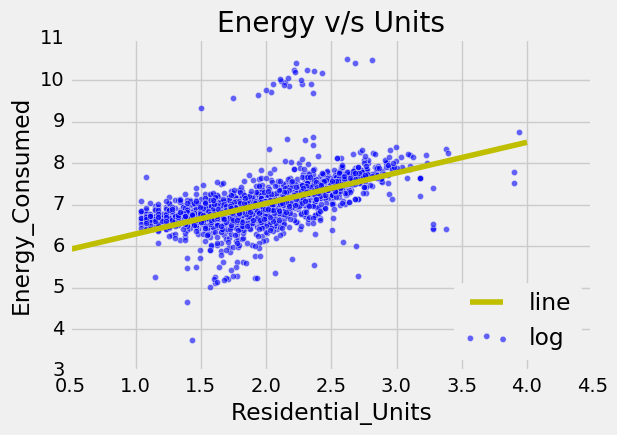

In [29]:
pl.scatter(log10(bblnrgdata_clean.UnitsRes), log10(bblnrgdata_clean.energy_comsumption), alpha=0.6, label="log")
x_line = np.linspace(0,4,10)
x_fit = sm.add_constant(x_line)
pl.plot(x_line, model_fit.predict(x_fit),'y-', label="line")
pl.plot()
pl.ylabel("Energy_Consumed")
pl.xlabel("Residential_Units")
pl.title("Energy v/s Units")
plt.xlim([0.5,4.5])
pl.legend(loc="lower right")
pl.show()

In [30]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     energy_comsumption   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     1887.
Date:                Tue, 18 Oct 2016   Prob (F-statistic):               0.00
Time:                        16:23:26   Log-Likelihood:                -1522.2
No. Observations:                3461   AIC:                             3048.
Df Residuals:                    3459   BIC:                             3061.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          5.5525      0.034    163.619      0.000         5.486     5.619
UnitsRes       0.7367      0.017     43.443      0.000         0.703     0.770
==============================================================================
Omnibus:                     2110.786   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96633.357
Skew:                           2.246   Prob(JB):                         0.00
Kurtosis:                      28.494   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#Model - 2:
X = sm.add_constant(np.log10(bblnrgdata_clean.energy_comsumption))
model = sm.OLS(np.log10(bblnrgdata_clean.UnitsRes), X, missing='drop') 

model_fit_2 = model.fit()
Y = model_fit_2.predict()
y = np.log10(bblnrgdata_clean.UnitsRes)

#Error Term:
sigma = y/2

#Formula:
chisq = ((y - Y)**2 / sigma**2).sum()

print ("Chi-Sq Test Result for Units v/s Energy is {}".format(chisq))

Chi-Sq Test Result for Units v/s Energy is 420.66562985266654


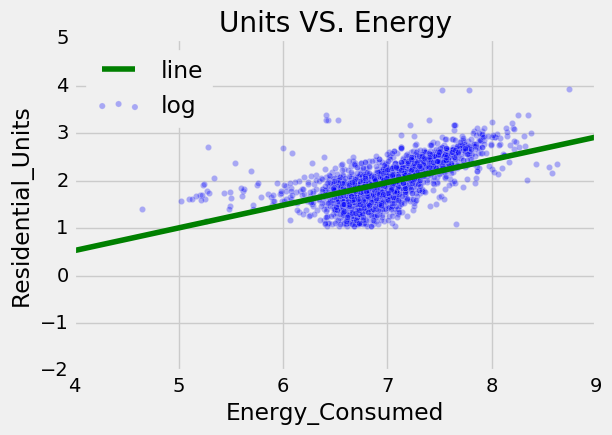

In [32]:
pl.scatter(log10(bblnrgdata_clean.energy_comsumption), log10(bblnrgdata_clean.UnitsRes), alpha=0.3, label="log")
x_line = np.linspace(1,10,10)
x_fit = sm.add_constant(x_line)
pl.plot(x_line, model_fit_2.predict(x_fit), 'g-', label="line")
pl.plot()
pl.ylabel("Residential_Units")
pl.xlabel("Energy_Consumed")
pl.title("Units VS. Energy")
pl.legend(loc="upper left")
plt.xlim(4,9)
pl.show()

In [33]:
model_fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               UnitsRes   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     1887.
Date:                Tue, 18 Oct 2016   Prob (F-statistic):               0.00
Time:                        16:23:38   Log-Likelihood:                -777.79
No. Observations:                3461   AIC:                             1560.
Df Residuals:                    3459   BIC:                             1572.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const                 -1.3890      0.077    -17.949      0.000        -1.541    -1.237
energy_comsumption     0.4792      0.011     43.443      0.000         0.458     0.501
==============================================================================
Omnibus:                      280.358   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1479.588
Skew:                          -0.173   Prob(JB):                         0.00
Kurtosis:                       6.184   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
data_new = bblnrgdata_clean[["energy_comsumption","UnitsRes"]]
data_new = data_new.applymap(np.log10)

In [35]:
data_new.head(5)

,energy_comsumption,UnitsRes
19,6.950549,1.732394
20,6.811909,1.875061
21,6.860458,2.107210
23,6.919769,1.748188
24,10.415995,2.685742


In [36]:
data_new["URNew"] = data_new.UnitsRes**2

In [37]:
poly_1 = smf.ols(formula = 'energy_comsumption ~ URNew + UnitsRes', data=data_new).fit()

In [38]:
poly_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     energy_comsumption   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     971.1
Date:                Tue, 18 Oct 2016   Prob (F-statistic):               0.00
Time:                        16:23:46   Log-Likelihood:                -1504.3
No. Observations:                3461   AIC:                             3015.
Df Residuals:                    3458   BIC:                             3033.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.2299      0.118     52.823      0.000         5.999     6.461
URNew          0.1669      0.028      5.995      0.000         0.112     0.222
UnitsRes       0.0519      0.115      0.450      0.653        -0.174     0.278
==============================================================================
Omnibus:                     2111.535   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106260.647
Skew:                           2.217   Prob(JB):                         0.00
Kurtosis:                      29.781   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

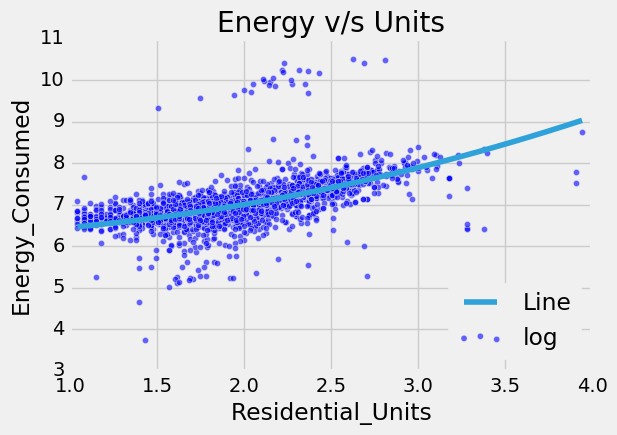

In [39]:
pl.scatter(log10(bblnrgdata_clean.UnitsRes), log10(bblnrgdata_clean.energy_comsumption), alpha=0.6, label="log")
new_df = pd.DataFrame()
new_df['UnitsRes'] = np.arange(log10(bblnrgdata_clean.UnitsRes).min(), log10(bblnrgdata_clean.UnitsRes).max(), 0.1)
new_df['URNew'] = new_df['UnitsRes'] * new_df['UnitsRes']
pl.plot(new_df['UnitsRes'], poly_1.predict(new_df), '-', label="Line")
pl.plot()
pl.ylabel("Energy_Consumed")
pl.xlabel("Residential_Units")
pl.title("Energy v/s Units")
plt.xlim([1,4])
pl.legend(loc="lower right")
pl.show()

## Extra credit 1: calculate and plot the likelihood surface
Create a function that minimizes the residuals:

the residuals are the sum of the differences between data and model: in the case of a line fit model. Use the same function you created for the chi^2 test.

You should sum over each datapoints the residuals squared, which should look something like

(np.log(bblnrgdatacut.nrg) - np.log(bblnrgdatacut.UnitsTotal)*a+b )^2 / errors^2

where a and b are the parameters returned by the line fitter. 

For each data point you can calculate the model at different values : for example in a range B = np.arange (-100, 100, 1) for the intercept, and A = np.arange(-50.0, 50.0, 0.5) for the slope.


You can write it as a nested for loop (or challenge yourself and vectorize it!) with a loop inside another ranging all poissible combinations of the 2 variables (i use enumerate to get both an index from 0 to the size of my array, which i assign to i (and j) and the value of the array at that index - look up the syntax!):


Lsurface = np.zeros((len(A), len(B)))
for i,a in enumerate(A):
    for j,b in enumerate(B):
         Lsurface[i][j] = np.nansum(residuals(a,b,data,errors)) .....

this gives you a 2D array that represents your likelihood surface! What we do to find a good fit is find the minimum (lowest point) on this surface.
You can plot a surface (a 2D array) with pl.imshow(Lsurface) as a "heatmap" but when you do that you will find that the plot is very uninformative. just like you did before with the data, plot the log of it (pl.imshow(np.log(Lsurface)). Also make sure your x and y axes tick numbers represent the range of values, not the cell index, which is the default for imshow. Inputting your data in the cell below should give a plot similar to mine

In [41]:
LR = -2*((-1522.2) - (-1504.3))
LR

35.80000000000018

In [42]:
smf.ols(formula = 'energy_comsumption ~ URNew + UnitsRes',\
        data=data_new).fit().compare_lr_test(smf.ols(formula = 'energy_comsumption ~  UnitsRes',\
                                                     data=bblnrgdata_clean).fit())

(151899.78500904227, 0.0, 1.0)

In [43]:
errors = np.log10(bblnrgdata_clean.energy_comsumption)/2

In [44]:
def residual(a,b): 
    temp = (np.log10(bblnrgdata_clean.energy_comsumption) - (np.log10(bblnrgdata_clean.UnitsRes)*a+b))**2 
    return (temp/ errors**2).sum()

In [45]:
intercept = np.arange (-100, 100, 1)
slope =  np.arange(-50.0, 50.0, 0.5)

In [46]:
Lsurface = np.zeros((len(slope), len(intercept)))

In [47]:
vecres = np.vectorize(residual)
Lsurface = np.array([vecres(slope, i) for i in intercept]).reshape(len(slope), len(intercept))

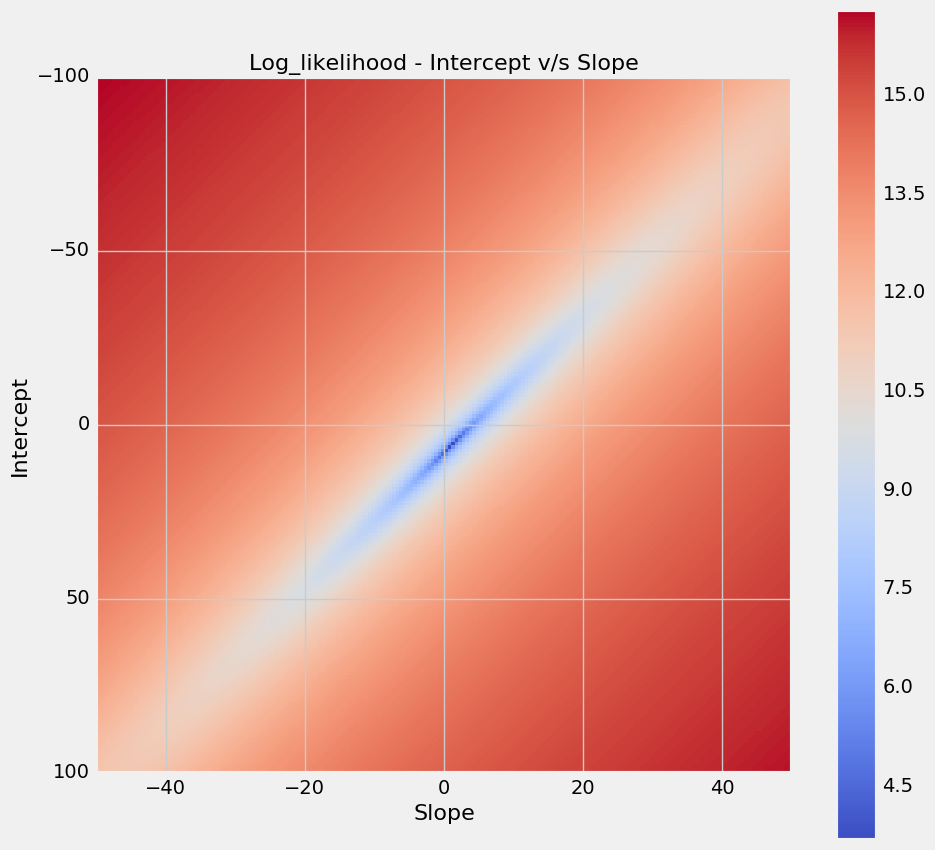

In [48]:
pl.figure(figsize=(10,10))
pl.title ("Log_likelihood - Intercept v/s Slope", fontsize = 16)
pl.imshow(np.log(Lsurface), interpolation='nearest',extent = [-50,50,100,-100], cmap=cm.coolwarm,aspect=0.5)
pl.xlabel('Slope', fontsize = 16)
pl.ylabel('Intercept', fontsize = 16)
pl.colorbar()

## EXTRA CREDIT: get creative with the dataset. can you make an insigntful plot to show any structure in the data?

below I am mapping the building age to a colormap and the ratio of total to residential units to the size of the datapoint.

In [61]:
data_cut = bblnrgdata_clean[["AssessLand","AssessTot","BldgArea","ResArea","RetailArea"]]

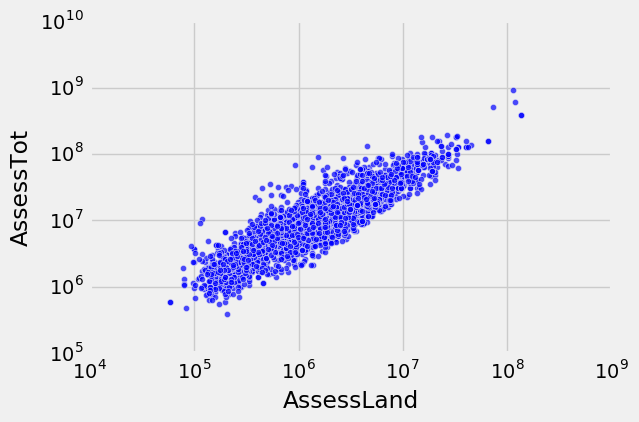

In [62]:
data_cut.plot.scatter(x="AssessLand", y="AssessTot", alpha=0.7, loglog=True)

In [ ]:
#Professor's Code - Idea used but the code not implemented verbatum 
print ("LR : ", -2 * (-linemodel.llf - (-curvemodel.llf)))
print ("LR from statsmodels:", curvemodel.compare_lr_test(linemodel))